# Alsea River Data Analysis of Temperature Variability and Flow Rate for 2012-2013
Copyright (C) 2024 Nika Lebedev, Oregon State University 

##### This code imports matlab data files that contain temperature and time data from two different sites in the alsea estuary. The temperature data is extracted and the files for each site are added to contain the full season that the data was taken. The time is formatted from matlab date num to python date time format. Each locations temperature is plotted, including a separate plot that contains the difference between the downriver and upriver temperatures. Finally, the last plot is the flow rate for the alsea river (taken from USGS) and this data was formatted into python date time standard and then converted from cubic feet to cubic meters. Lastly, the dates were converted from csv standard to a standard that matches the data from the matlab files. There were certain areas where data was either missing and/or dates didn't exactly match up and leeway was given to allow for calculations of temperature difference. 

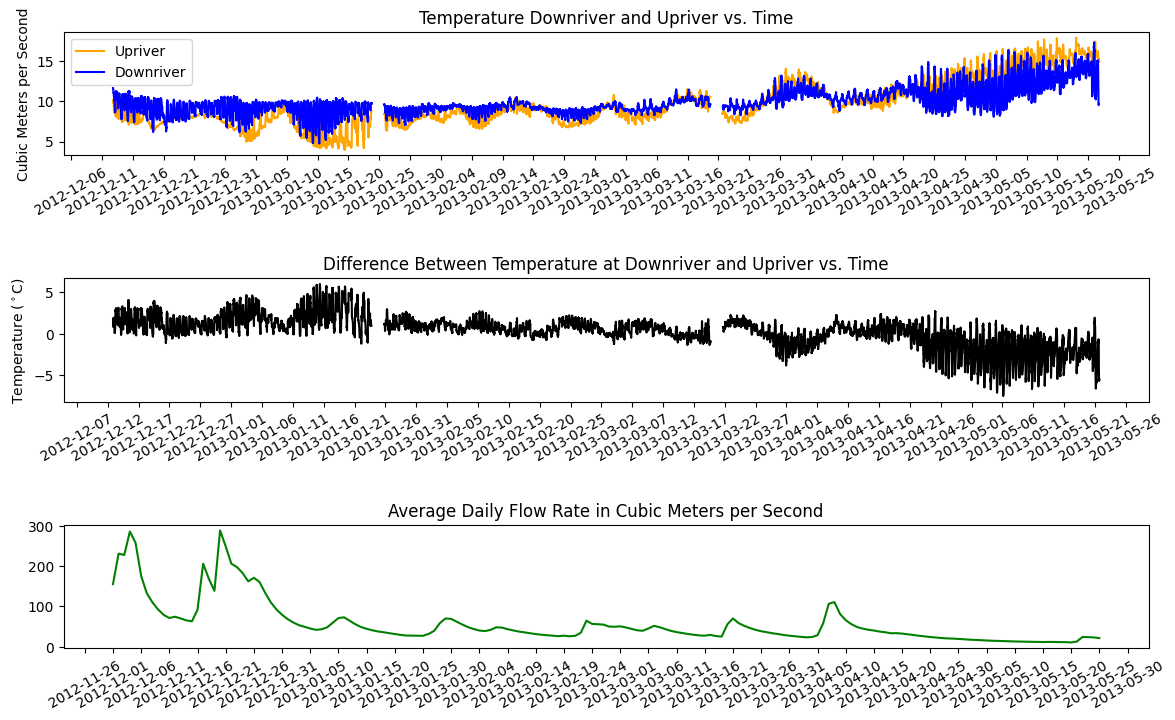

In [3]:
import pandas as pd
import scipy.io as sio
import numpy as np
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

#import down river data
matDataD1 = sio.loadmat('2012-13\\mcat_dnriver_7162_Dep1.mat')
matDataD2 = sio.loadmat('2012-13\\mcat_dnriver_7162_Dep2.mat')
matDataD3 = sio.loadmat('2012-13\\mcat_dnriver_7162_Dep3.mat')

#import upriver data
matDataU1 = sio.loadmat('2012-13\\mcat_upriver_6865_Dep1.mat')
matDataU2 = sio.loadmat('2012-13\\mcat_upriver_6865_Dep2.mat')
matDataU3 = sio.loadmat('2012-13\\mcat_upriver_6865_Dep3.mat')

#mat lab date origin
origin = np.datetime64('0000-01-01', 'D') - np.timedelta64(1, 'D')

#combining the downriver data
matDataD1Filtered = {dictKey:dictValue for dictKey, dictValue in matDataD1.items() if dictKey[0] != '_'}
matD1DF = pd.DataFrame({dictKey: np.array(dictValue).flatten() for dictKey, dictValue in matDataD1Filtered.items()})
matDataD2Filtered = {dictKey:dictValue for dictKey, dictValue in matDataD2.items() if dictKey[0] != '_'}
matD2DF = pd.DataFrame({dictKey: np.array(dictValue).flatten() for dictKey, dictValue in matDataD2Filtered.items()})
matDataD3Filtered = {dictKey:dictValue for dictKey, dictValue in matDataD3.items() if dictKey[0] != '_'}
matD3DF = pd.DataFrame({dictKey: np.array(dictValue).flatten() for dictKey, dictValue in matDataD3Filtered.items()})

matDDF = pd.concat([matD1DF, matD2DF, matD3DF])
tmsDownriver = matDDF['DN'] * np.timedelta64(1, 'D') + origin


#combining the upriver data
matDataU1Filtered = {dictKey:dictValue for dictKey, dictValue in matDataU1.items() if dictKey[0] != '_'}
matU1DF = pd.DataFrame({dictKey: np.array(dictValue).flatten() for dictKey, dictValue in matDataU1Filtered.items()})
matDataU2Filtered = {dictKey:dictValue for dictKey, dictValue in matDataU2.items() if dictKey[0] != '_'}
matU2DF = pd.DataFrame({dictKey: np.array(dictValue).flatten() for dictKey, dictValue in matDataU2Filtered.items()})
matDataU3Filtered = {dictKey:dictValue for dictKey, dictValue in matDataU3.items() if dictKey[0] != '_'}
matU3DF = pd.DataFrame({dictKey: np.array(dictValue).flatten() for dictKey, dictValue in matDataU3Filtered.items()})

matUDF = pd.concat([matU1DF, matU2DF, matU3DF])
tmsUpriver = matUDF['DN'] * np.timedelta64(1, 'D') + origin

#reading in flow data
flowDF = pd.read_csv('2012_2013alsea.csv')
flowDF['fRate'] = flowDF['max_va'] * 0.0283168
#create a new column for flow dates
for index, row in flowDF.iterrows():
    calcDate = pd.Timestamp(year=int(row['begin_yr']), month=int(row['month_nu']), day=int(row['day_nu']))
    flowDF.loc[index, 'DN'] = calcDate

tmsFlow = flowDF['DN']

#making up for missing data values in DDF, and not matching time stamps
matDiff = pd.merge_asof(left = matDDF, right = matUDF, on = 'DN')
matDiff['deltaT'] = matDiff['T_x']-matDiff['T_y']
tmsDiff = matDiff['DN'] * np.timedelta64(1, 'D') + origin

#plotting subplots
fig, (ax,axdiff,axflow) = plt.subplots(3,figsize=(14, 8))
ax.set_title("Temperature Downriver and Upriver vs. Time")
#add second plot below that shows temperature difference
axdiff.set_title("Difference Between Temperature at Downriver and Upriver vs. Time")
plt.setp(ax, ylabel = "Temperature ($^\circ$C)")
plt.setp(axdiff, ylabel = "Temperature ($^\circ$C)")
ax.plot(tmsUpriver, matUDF['T'], color = 'orange', label='Upriver')
ax.plot(tmsDownriver,matDDF['T'], color = 'blue', label = 'Downriver')
axdiff.plot(tmsDownriver,matDiff['deltaT'],color = 'black', label = "Difference")
axflow.set_title("Average Daily Flow Rate in Cubic Meters per Second")
plt.setp(ax, ylabel = "Cubic Meters per Second")
axflow.plot(tmsFlow,flowDF['fRate'], color = 'green', label = 'FlowRate')
axflow.xaxis.set_major_locator(mdates.DayLocator(interval=5))
axflow.xaxis.set_tick_params(rotation = 30)

# Change the tick interval
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5)) 
axdiff.xaxis.set_major_locator(mdates.DayLocator(interval=5))
# Puts x-axis labels on an angle
ax.xaxis.set_tick_params(rotation = 30)  
axdiff.xaxis.set_tick_params(rotation = 30)
plt.subplots_adjust(hspace=1)

ax.legend() 
plt.show()


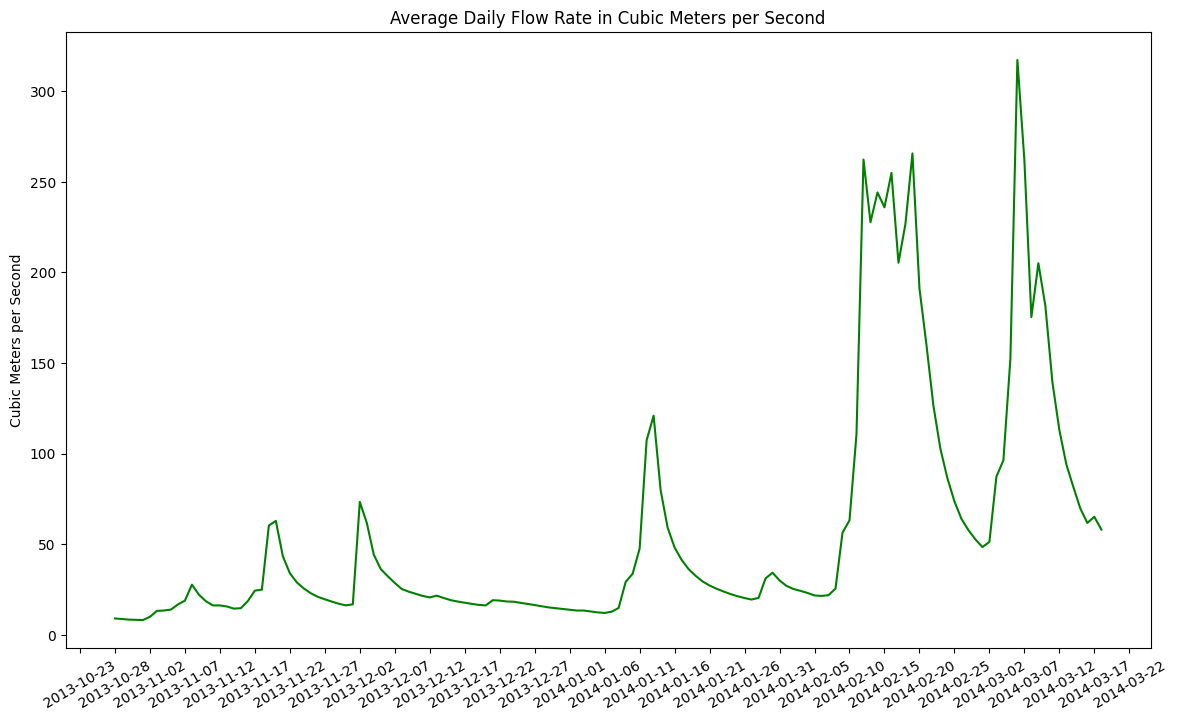

In [4]:
#read in csv file
flowDF = pd.read_csv('2013_2014alsea.csv')
flowDF['fRate'] = flowDF['max_va'] * 0.0283168
flowDF['DN'] = pd.NaT

#create a new column for flow dates
for index, row in flowDF.iterrows():
    calcDate = pd.Timestamp(year=int(row['begin_yr']), month=int(row['month_nu']), day=int(row['day_nu']))
    flowDF.loc[index, 'DN'] = calcDate

tmsFlow = flowDF['DN']

#plot the flow graph
fig, (axflow) = plt.subplots(1,figsize=(14, 8))
axflow.set_title("Average Daily Flow Rate in Cubic Meters per Second")
plt.setp(axflow, ylabel = "Cubic Meters per Second")
axflow.plot(tmsFlow,flowDF['fRate'], color = 'green', label = 'FlowRate')
axflow.xaxis.set_major_locator(mdates.DayLocator(interval=5))
axflow.xaxis.set_tick_params(rotation = 30)
plt.show()